<a href="https://colab.research.google.com/github/ju-sants/biblioteca-pandas-matplotlib-plotly/blob/main/C%C3%B3pia_de_aula_python_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
vendas_correto = pd.read_excel('varejo.xlsx')

In [4]:
vendas_correto['estado'].fillna('MS', inplace=True)
vendas_correto['Preço'].fillna(vendas_correto['Preço'].mean(),inplace=True)
vendas_correto[vendas_correto['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log


In [5]:
vendas_correto = vendas_correto.query('Preço < Preço_com_frete')

In [6]:
vendas_correto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22047 entries, 2 to 80194
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           22047 non-null  int64         
 1   idcanalvenda       22047 non-null  object        
 2   bandeira           22047 non-null  object        
 3   Data               22047 non-null  datetime64[ns]
 4   Preço              22047 non-null  float64       
 5   Preço_com_frete    22047 non-null  float64       
 6   Nome_Departamento  22047 non-null  object        
 7   estado             22047 non-null  object        
 8   cliente_Log        22047 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [7]:
top_10_departamentos_mais_vendidos = vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index().head(10)
top_10_departamentos_mais_vendidos

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades Domesticas,1366
5,Acessorios e Inovacoes,1243
6,Beleza e Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos de Limpeza,522


In [8]:
media_p_f_d = round(vendas_correto.groupby(['Nome_Departamento', 'bandeira']).Preço_com_frete.mean().sort_values(ascending=False).reset_index().head(10), 2)
media_p_f_d

,Nome_Departamento,bandeira,Preço_com_frete
0,TVs e Acessorios,A,3899.09
1,TVs e Acessorios,B,3136.23
2,Informatica,B,2231.00
3,Informatica,A,2132.81
4,Linha Industrial,B,2130.02
5,Cine e Foto,B,2024.39
6,Tablets,B,1779.19
7,Linha Industrial,A,1666.90
8,Cine e Foto,A,1562.55
9,Eletrodomesticos,A,1477.33


<Figure size 1500x1000 with 0 Axes>

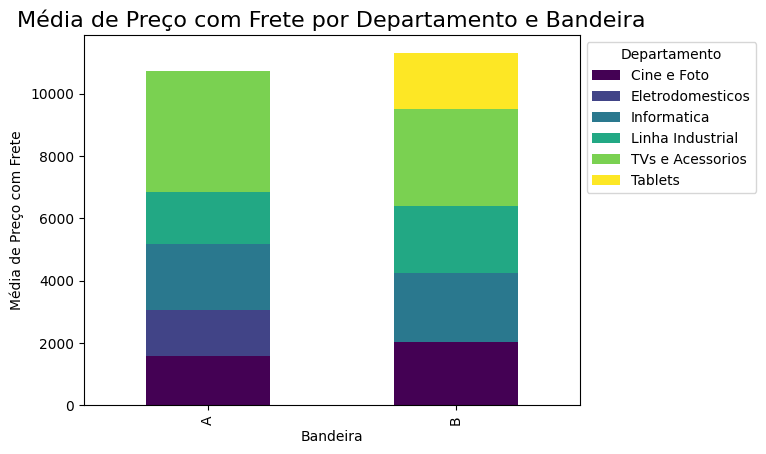

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

media_p_f_d_pivot = media_p_f_d.pivot_table(index='bandeira', columns='Nome_Departamento', values='Preço_com_frete')
media_p_f_d_pivot.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Média de Preço com Frete por Departamento e Bandeira', fontsize= 16)
plt.xlabel('Bandeira', fontsize = 10)
plt.ylabel('Média de Preço com Frete', fontsize=10)

plt.legend(title='Departamento', bbox_to_anchor=(1, 1), loc='upper left')


In [10]:
vendas_correto['mes'] = vendas_correto['Data'].dt.month
vendas_mes = vendas_correto.groupby('mes').idcompra.nunique().sort_values(ascending=True)
vendas_mes

,idcompra
mes,
2,5138
1,5309
4,5454
3,5590


In [11]:
clientes = pd.read_excel('cliente_varejo.xlsx')
clientes.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


In [12]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [13]:
clientes = clientes.astype({
    'renda': 'float'
})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [14]:
vendas_cliente = vendas_correto.merge(clientes, how='left', on='cliente_Log')
media_renda_departamento = vendas_cliente.groupby('Nome_Departamento')['renda'].mean().sort_values(ascending=False).reset_index().head(10)

media_renda_departamento

,Nome_Departamento,renda
0,Moda,10948.285714
1,Cine e Foto,9337.250000
2,Relogios,9076.116279
3,Ar e Ventilacao,8375.519345
4,Utilidades Domesticas,8332.539416
5,Acessorios e Inovacoes,8303.235246
6,Linha Industrial,8302.166667
7,Brinquedos,8294.367975
8,Bebes,8258.135647
9,Informatica,8257.609403


Text(0.5, 0, 'Departamento')

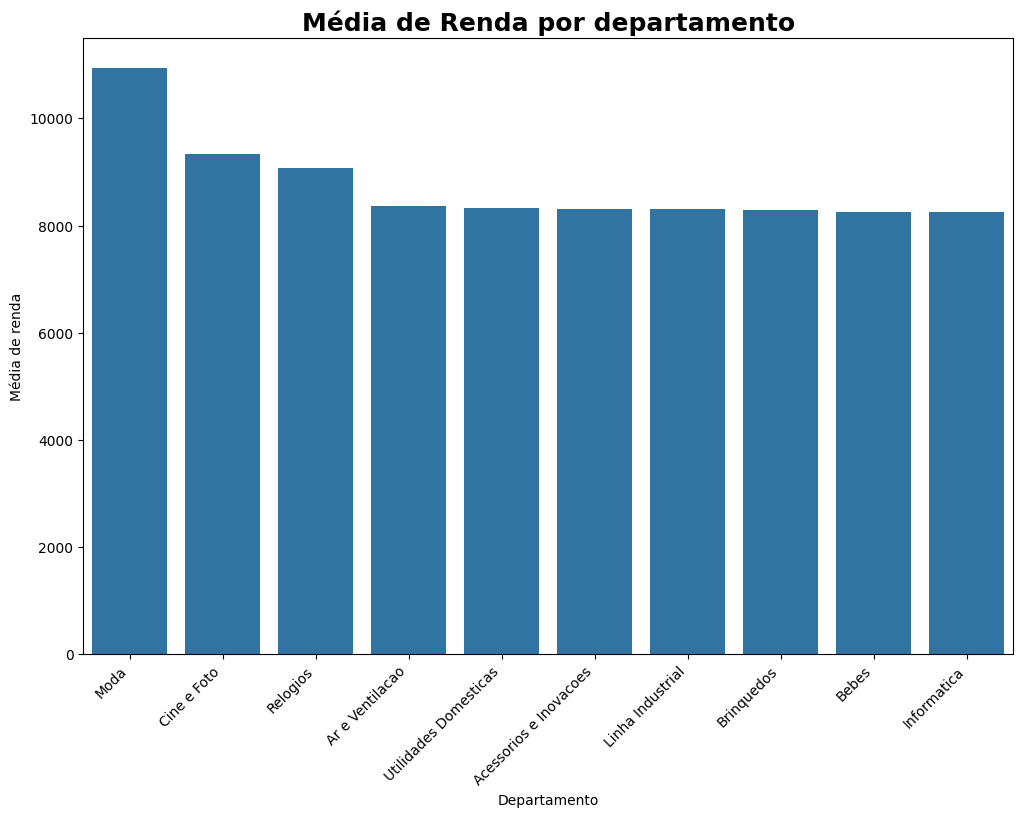

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(data=media_renda_departamento, x='Nome_Departamento', y='renda')
plt.xticks(rotation=45, ha='right');
plt.title('Média de Renda por departamento', color='black', fontsize=18, fontweight='bold', loc='center')
plt.ylabel('Média de renda', fontsize=10)
plt.xlabel('Departamento', fontsize=10)


In [16]:
media_idade_b = round(vendas_cliente.groupby('bandeira').idade.mean().reset_index(), 2)
media_idade_b

,bandeira,idade
0,A,53.30
1,B,53.29


Text(0, 0.5, 'Média de idade')

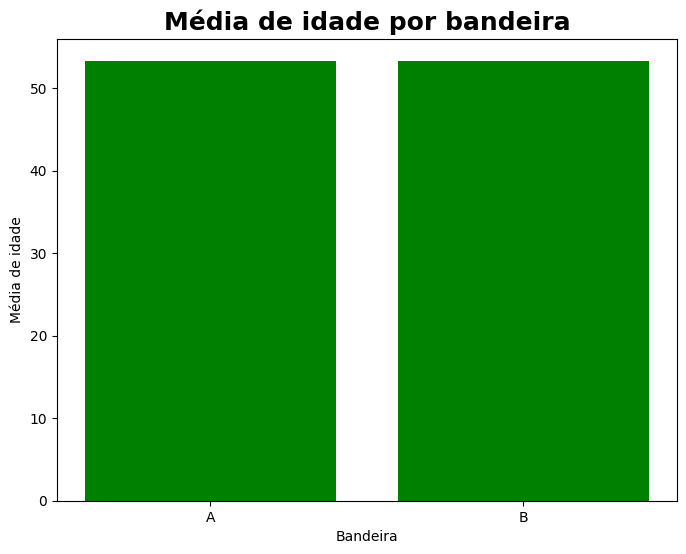

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(media_idade_b['bandeira'], media_idade_b['idade'], color='green')

plt.title('Média de idade por bandeira', loc='center', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Bandeira', fontsize=10)
plt.ylabel('Média de idade', fontsize=10)


In [18]:
vendas_por_data = vendas_correto.groupby('Data')['idcompra'].nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


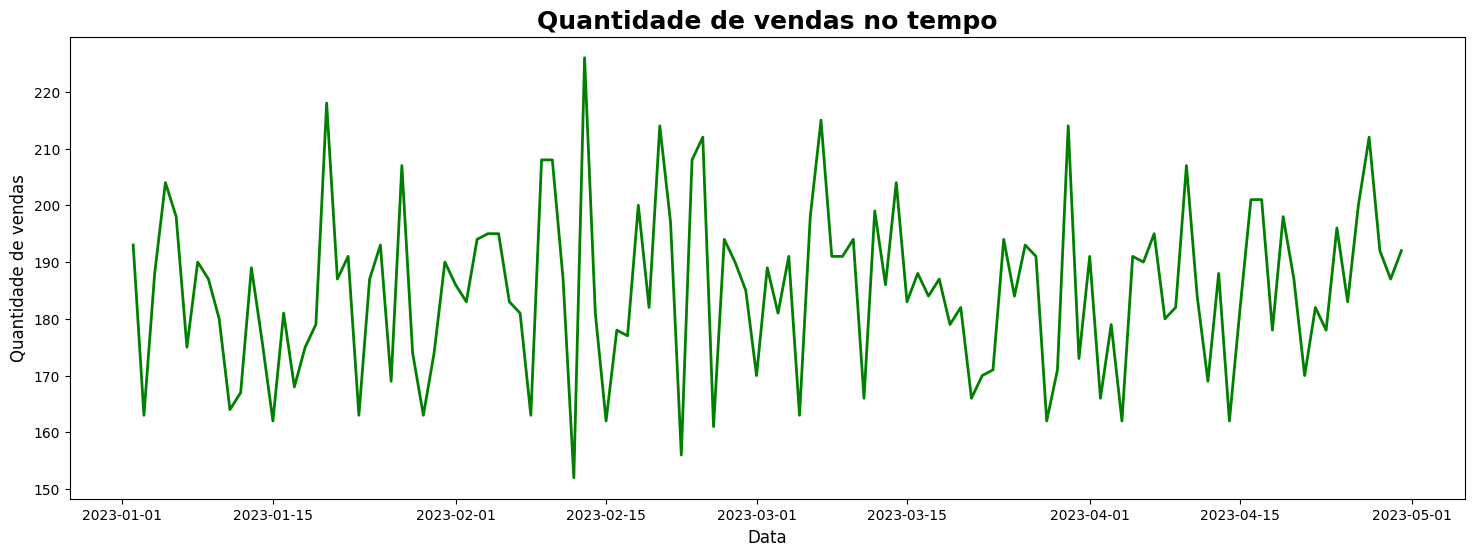

In [23]:
plt.figure(figsize=(18, 6))
plt.title('Quantidade de vendas no tempo', color='black', fontsize=18, fontweight='bold', loc='center')
plt.ylabel('Quantidade de vendas', fontsize= 12)
plt.xlabel('Data', fontsize=12)

x = vendas_por_data['Data']
y = vendas_por_data['idcompra']

plt.plot(x, y, linewidth='2', color='green')

In [24]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 648.9 kB/s eta 0:00:00


In [25]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [26]:
px.bar(media_idade_b, x='bandeira', y='idade')

In [28]:
px.line(vendas_por_data, x='Data', y='idcompra')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [41]:
fig = px.bar(media_renda_departamento, x='Nome_Departamento', y='renda', title='Renda média por departamento')
fig.add_annotation(x=15, y=5, text='Anotação', showarrow=True)